##Loading source datasets

here I am using the source data of Wikimedia Commons [London Underground geographic maps](https://commons.wikimedia.org/wiki/London_Underground_geographic_maps).


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive/My Drive/RLproject')

Mounted at /content/drive


In [4]:
stations = pd.read_csv('stations.txt')
routes = pd.read_csv('routes.txt')
line_definitions = pd.read_csv('line_definitions.txt')

#finished

##Adding connections between stations


In [20]:
connections = pd.DataFrame(columns=['line',	'line_name',	'line_colour', 'station1', 'station1_name', 'station1_long','station1_lat', 'station1_zone', 'station1_total_lines',	'station1_rail', 'station2', 'station2_name', 'station2_long','station2_lat', 'station2_zone', 'station2_total_lines',	'station2_rail'])
connections = connections.iloc[0:0]

In [21]:
for index, row in line_definitions.iterrows():
  connections = connections.append({'line': row[2],
                                    'line_name': routes[routes['line']==row[2]]['name'].item(),
                                    'line_colour': routes[routes['line']==row[2]]['colour'].item(),
                                    'station1': row[0],
                                    'station1_name': stations[stations['id']==row[0]]['name'].item(),
                                    'station1_long': stations[stations['id']==row[0]]['longitude'].item(),
                                    'station1_lat': stations[stations['id']==row[0]]['latitude'].item(),
                                    'station1_zone': stations[stations['id']==row[0]]['zone'].item(),
                                    'station1_total_lines': stations[stations['id']==row[0]]['total_lines'].item(),
                                    'station1_rail': stations[stations['id']==row[0]]['rail'].item(),
                                    'station2': row[1],
                                    'station2_name': stations[stations['id']==row[1]]['name'].item(),
                                    'station2_long': stations[stations['id']==row[1]]['longitude'].item(),
                                    'station2_lat': stations[stations['id']==row[1]]['latitude'].item(),
                                    'station2_zone': stations[stations['id']==row[1]]['zone'].item(),
                                    'station2_total_lines': stations[stations['id']==row[1]]['total_lines'].item(),
                                    'station2_rail': stations[stations['id']==row[1]]['rail'].item(),
                                    }, ignore_index=True)


In [22]:
connections

,line,line_name,line_colour,station1,station1_name,station1_long,station1_lat,station1_zone,station1_total_lines,station1_rail,station2,station2_name,station2_long,station2_lat,station2_zone,station2_total_lines,station2_rail
0,1,Bakerloo Line,ab6612,11,Baker Street,-0.1571,51.5226,1.0,5,0,163,Marylebone,-0.1631,51.5225,1.0,1,1
1,1,Bakerloo Line,ab6612,11,Baker Street,-0.1571,51.5226,1.0,5,0,212,Regent's Park,-0.1466,51.5234,1.0,1,0
2,1,Bakerloo Line,ab6612,49,Charing Cross,-0.1247,51.5080,1.0,2,1,87,Embankment,-0.1223,51.5074,1.0,4,0
3,1,Bakerloo Line,ab6612,49,Charing Cross,-0.1247,51.5080,1.0,2,1,197,Piccadilly Circus,-0.1342,51.5098,1.0,2,0
4,1,Bakerloo Line,ab6612,82,Edgware Road (B),-0.1679,51.5199,1.0,1,0,163,Marylebone,-0.1631,51.5225,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,13,Docklands Light Railway,00A77E,225,Shadwell,-0.0560,51.5117,2.0,2,0,262,Tower Gateway,-0.0743,51.5106,1.0,1,0
411,13,Docklands Light Railway,00A77E,284,Westferry,-0.0265,51.5097,2.0,1,0,292,West India Quay,-0.0203,51.5070,2.0,1,0
412,13,Docklands Light Railway,00A77E,304,West Silvertown,0.0226,51.5027,3.0,1,0,305,Pontoon Dock,0.0319,51.5021,3.0,1,0
413,13,Docklands Light Railway,00A77E,305,Pontoon Dock,0.0319,51.5021,3.0,1,0,306,London City Airport,0.0488,51.5037,3.0,1,0


In [23]:
print("Number of connections in graph:", len(connections))

Number of connections in graph: 415


##Calculating distance

First only consider point-to-point distance. Calculating using [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) (?)

In [24]:
from math import cos, asin, sqrt, pi
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))


In [25]:
distances=[]
for index, row in connections.iterrows():
  distances.append(distance(row[6], row[5], row[13], row[12]))
connections['distance'] = distances

##Making Zone 1 dataset

In [ ]:
connections_z1 = connections[(connections['station1_zone']<2) & (connections['station2_zone']<2)]
keys = pd.unique(connections_z1[['station1', 'station2']].values.ravel('K'))
reindex_dict = dict(zip(keys, range(len(keys))))
connections_z1 = connections_z1.replace({"station1": reindex_dict}).replace({"station2": reindex_dict})
print("Number of connections in Zone 1:", len(connections_z1))

Number of connections in Zone 1: 188


##Building Network

In [45]:
import networkx as nx
graph_distance = nx.Graph()
for connection_id, connection in connections.iterrows():
    graph_distance.add_edge(connection['station1_name'], connection['station2_name'], weight = connection['distance'])

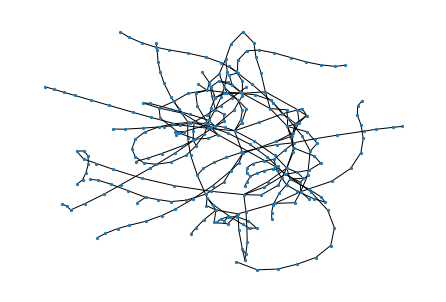

In [ ]:
nx.draw(graph_distance, node_size=5)

In [ ]:
for i in ['Waterloo', 'Euston', 'Vauxhall', 'Oxford Circus', 'Elephant & Castle']:
  print(f"\n{i} station is connected to:", *list(graph_distance.neighbors(i)), sep='\n\t', )


Waterloo station is connected to:
	Embankment
	Lambeth North
	Southwark
	Westminster
	Kennington
	Bank

Euston station is connected to:
	Camden Town
	King's Cross St. Pancras
	Mornington Crescent
	Warren Street

Vauxhall station is connected to:
	Pimlico
	Stockwell

Oxford Circus station is connected to:
	Piccadilly Circus
	Regent's Park
	Bond Street
	Tottenham Court Road
	Green Park
	Warren Street

Elephant & Castle station is connected to:
	Lambeth North
	Borough
	Kennington


In [ ]:
def shortest_route(start, end):
    journey_path = nx.shortest_path(graph_distance, start, end, weight='weight')
    journey_distance = nx.shortest_path_length(graph_distance, start, end, weight='weight')
    print(f'\nShortest-Tube-Distance Journey from {start} to {end}:', *journey_path, sep='\n\t')
    print('\nJourney Distance:', journey_distance, 'kilometers')

In [ ]:
shortest_route('Waterloo', 'Euston')


Shortest-Tube-Distance Journey from Waterloo to Euston:
	Waterloo
	Embankment
	Charing Cross
	Leicester Square
	Tottenham Court Road
	Goodge Street
	Warren Street
	Euston

Journey Distance: 3.4763636864651986 kilometers


In [ ]:
#Jubilee goes directly from Canary Wharf to Covent Garden, and it takes 30 min on Google Maps,
#This shortest_distance journey includes 2 changes, from DLR ==> Central ==> Piccadily, and takes 34 min on Google Maps
shortest_route('Canary Wharf', 'Covent Garden')


Shortest-Tube-Distance Journey from Canary Wharf to Covent Garden:
	Canary Wharf
	West India Quay
	Westferry
	Limehouse
	Shadwell
	Bank
	St. Paul's
	Chancery Lane
	Holborn
	Covent Garden

Journey Distance: 7.96831555899172 kilometers


## Random Walk Result

In [ ]:
def random_walk(network, start):
  network.index = range(len(network.index))
  position = start
  total_distance = 0
  keys = pd.unique(network[['station1', 'station2']].values.ravel('K'))
  complete = dict(zip(keys, [False] * len(network)))
  step = 0
  done = False
  while not done:
    edge = network[(network['station1'] == position) | (network['station2'] == position)].sample()
    total_distance += edge['distance'].item()
    if position == edge['station1'].item():
      complete[edge['station1'].item()] = True
      position = edge['station2'].item()
    else:
      complete[edge['station2'].item()] = True
      position = edge['station1'].item()
    done = all(value == True for value in complete.values())
    step += 1
  return step, total_distance


In [ ]:
#starting from Morden, travel the whole London tube network:
random_walk(connections, 169)

(39707, 44969.97324926441)

##implement the random walk with numpy 
this is much more effecient in terms of computation

In [ ]:
network = connections[['station1', 'station2', 'distance', 'line']].to_numpy()

In [ ]:
#making a 'completed' dict
keys = pd.unique(connections[['station1', 'station2']].values.ravel('K'))
completed = dict(zip(keys, [False] * len(connections)))

#initialize with a starting state
state = 169
total_distance = 0
completed[state] = True
step = 0
done = False

#loop until every stop is completed
while not done:
  actions = np.concatenate([network[(network[:,0] == state)], network[(network[:,1] == state)]])
  action = actions[np.random.randint(len(actions))]
  total_distance += action[2]
  if state == action[0]:
    state = action[1]
  else:
    state = action[0]
  completed[state] = True
  done = all(value == True for value in completed.values())
  step += 1
print(step, total_distance)

19440 21819.461735075878


## Q learning Zone 1 only

In [ ]:
network = connections_z1[['station1', 'station2', 'distance', 'line']].to_numpy()

In [ ]:
def q_learning(qsa, next_qs, r, alpha=0.1, gamma=1.0):  
    return qsa + alpha * (r + gamma * np.max(next_qs) - qsa)

In [ ]:
runs = 1
episodes = 1000
epsilon_min = 0.01
epsilon_decay = 0.999
total_distances = np.zeros(episodes)

for r in range(runs):
  #q values lookup table
  q_qlearning = np.zeros([len(network), len(network)])
  epsilon = 1

  for i in range(episodes):
    #initialize with a starting state
    state = 0
    total_distance = 0
    #making a 'completed' dict
    keys = pd.unique(connections_z1[['station1', 'station2']].values.ravel('K'))
    completed = dict(zip(keys, [False] * len(connections_z1)))
    completed[state] = True
    step = 0
    done = False
    #epsilon decay
    if epsilon > epsilon_min:
      epsilon *= epsilon_decay

    while not done:     
      #the avaliable actions 
      actions = np.concatenate([network[(network[:,0] == state)][:,1],network[(network[:,1] == state)][:,0]]).astype(None).tolist()
      distances = np.concatenate([network[(network[:,0] == state)][:,2], network[(network[:,1] == state)][:,2]])
      actions_idx = [int(x) for x in actions] 
      state = int(state)
      q = q_qlearning[state, actions_idx]

      #choosing action base on epsilon greedy policy
      if np.random.rand() > epsilon:
        idx = np.argmax(q)
      else:
        idx = random.randint(0, len(actions)-1)
      action = actions_idx[idx]
      distance = distances[idx]

      #update distance and 'completed' dict
      total_distance += distance
      completed[state] = True

      #update q values ('action' = 'next_state')
      action = int(action)
      q_qlearning[state, action] = q_learning(q_qlearning[state, action], q_qlearning[action, :], -distance)

      #update state
      state = action
      done = all(value == True for value in completed.values())
      step += 1
    total_distances[i] += total_distance

NameError: ignored

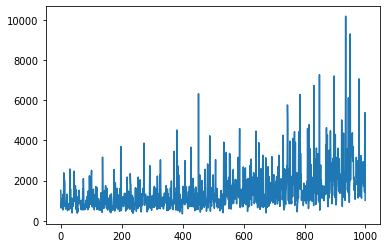

In [ ]:
plt.plot(total_distances)

As this plot shows, as the number of episode (and value of epsilon) increases, the performance gets worse and worse than a random policy. We can't simply take the current station as state, the next station as action, and give the state-action a value. In this sequential decision making process, the desirablity of travelling from one station to another station is going to vary overtime. 

# Can solve this by transforming it to a TSP problem

With a few more preprocessing steps, this problem can be reduced to the most basic TSP problem, in which the network is complete (each node is connected with one another), and each node can only be travelled once.

###Split stations to station*line(platforms) to address transit cost:

In [5]:
stations_ = stations
stations_['line']=range(len(stations_.index))

In [6]:
two_lines = stations[stations['total_lines'] > 1]
three_lines = stations[stations['total_lines'] > 2]
four_lines = stations[stations['total_lines'] > 3]
five_lines = stations[stations['total_lines'] > 4]
six_lines = stations[stations['total_lines'] > 5]
stations_ = stations_.append([two_lines],ignore_index=True)
stations_ = stations_.append([three_lines],ignore_index=True)
stations_ = stations_.append([four_lines],ignore_index=True)
stations_ = stations_.append([five_lines],ignore_index=True)
stations_ = stations_.append([six_lines],ignore_index=True)

In [7]:
ilist=[]
for i in range(1,310):
  try:
    stations_.loc[stations_['id']==i, 'line'] = np.unique(np.concatenate((line_definitions[line_definitions['station1']==i]['line'].unique(), line_definitions[line_definitions['station2']==i]['line'].unique())))
  except:
    ilist.append(i)
    pass
ilist

[95, 150, 227, 254]

In [8]:
for i in ilist:
  print(stations_.loc[stations_['id']==i, 'total_lines'])

78    1
Name: total_lines, dtype: int64
131    1
Name: total_lines, dtype: int64
198    1
Name: total_lines, dtype: int64
223    2
367    2
Name: total_lines, dtype: int64


In [9]:
for i in ilist:
  print(np.unique(np.concatenate((line_definitions[line_definitions['station1']==i]['line'].unique(), line_definitions[line_definitions['station2']==i]['line'].unique()))))

[10 11]
[3 6]
[3 6]
[7]


In [10]:
stations_ = stations
stations_['line']=range(len(stations_.index))

In [11]:
stations.loc[stations['id']==95, 'total_lines'] = 2 
stations.loc[stations['id']==150, 'total_lines'] = 2 
stations.loc[stations['id']==227, 'total_lines'] = 2 
stations.loc[stations['id']==254, 'total_lines'] = 1 

In [12]:
two_lines = stations[stations['total_lines'] > 1]
three_lines = stations[stations['total_lines'] > 2]
four_lines = stations[stations['total_lines'] > 3]
five_lines = stations[stations['total_lines'] > 4]
six_lines = stations[stations['total_lines'] > 5]
stations_ = stations_.append([two_lines],ignore_index=True)
stations_ = stations_.append([three_lines],ignore_index=True)
stations_ = stations_.append([four_lines],ignore_index=True)
stations_ = stations_.append([five_lines],ignore_index=True)
stations_ = stations_.append([six_lines],ignore_index=True)

In [13]:
ilist=[]
for i in range(1,310):
  try:
    stations_.loc[stations_['id']==i, 'line'] = np.unique(np.concatenate((line_definitions[line_definitions['station1']==i]['line'].unique(), line_definitions[line_definitions['station2']==i]['line'].unique())))
  except:
    ilist.append(i)
ilist

[]

## dropping DLR

In [14]:
tubes = stations_[stations_['line']<13]

In [15]:
tubes['idx']= range(len(tubes.index))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
tubes['name'] = tubes['name'] + str(tubes['line'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## generating station*line(platform) connections

###making a connections dataframe with station*lines(platform) index

In [17]:
line_definitions_ = pd.DataFrame(columns=['station1',	'station2',	'line']).iloc[0:0]

In [ ]:
for index, row in line_definitions.iterrows():
  line_definitions_ = line_definitions_.append({'station1': tubes.loc[tubes['id']==row[0]][tubes['line']==row[2]]['idx'].item(),
                                                'station2': tubes.loc[tubes['id']==row[1]][tubes['line']==row[2]]['idx'].item(),
                                                'line': row[2]}, ignore_index=True)
line_definitions_ 

In [27]:
connections_ = pd.DataFrame(columns=['line',	'line_name',	'line_colour', 'station1', 'station1_name', 'station1_long','station1_lat', 'station1_zone', 'station1_total_lines',	'station1_rail', 'station2', 'station2_name', 'station2_long','station2_lat', 'station2_zone', 'station2_total_lines',	'station2_rail'])
connections_ = connections.iloc[0:0]

In [28]:
for index, row in line_definitions_.iterrows():
  connections_ = connections_.append({'line': row[2],
                                      'line_name': routes[routes['line']==row[2]]['name'].item(),
                                      'line_colour': routes[routes['line']==row[2]]['colour'].item(),
                                      'station1': row[0],
                                      'station1_name': tubes[tubes['idx']==row[0]]['name'].item(),
                                      'station1_long': tubes[tubes['idx']==row[0]]['longitude'].item(),
                                      'station1_lat': tubes[tubes['idx']==row[0]]['latitude'].item(),
                                      'station1_zone': tubes[tubes['idx']==row[0]]['zone'].item(),
                                      'station1_total_lines': tubes[tubes['idx']==row[0]]['total_lines'].item(),
                                      'station1_rail': tubes[tubes['idx']==row[0]]['rail'].item(),
                                      'station2': row[1],
                                      'station2_name': tubes[tubes['idx']==row[1]]['name'].item(),
                                      'station2_long': tubes[tubes['idx']==row[1]]['longitude'].item(),
                                      'station2_lat': tubes[tubes['idx']==row[1]]['latitude'].item(),
                                      'station2_zone': tubes[tubes['idx']==row[1]]['zone'].item(),
                                      'station2_total_lines': tubes[tubes['idx']==row[1]]['total_lines'].item(),
                                      'station2_rail': tubes[tubes['idx']==row[1]]['rail'].item(),
                                      }, ignore_index=True)

In [29]:
distances=[]
for index, row in connections_.iterrows():
  distances.append(distance(row[6], row[5], row[13], row[12]))
connections_['distance'] = distances

In [30]:
connections__ = connections_[['station1', 'station1_name','station2', 'station2_name', 'distance']]

Here I am addressing the cost of changing lines. 

Should also do a version without considering this.

In [31]:
for i in range(1, 385):
  test_list = tubes[tubes['id']==i]['idx'].tolist()
  for j in [(a, b) for idx, a in enumerate(test_list) for b in test_list[idx + 1:]]:
    connections__ = connections__.append({'station1': j[0],
                                          'station1_name': tubes[tubes['idx']==j[0]]['name'].item(),
                                          'station2': j[1],
                                          'station2_name': tubes[tubes['idx']==j[1]]['name'].item(),
                                          'distance': 1
                                          }, ignore_index=True)

In [32]:
connections__['station1_name'] = connections_['station1_name'] + ' ' + connections_['line_name'] 
connections__['station2_name'] = connections_['station2_name'] + ' ' + connections_['line_name'] 


## getting stations without DLR

In [49]:
tubes_unique=tubes.iloc[0:275]

##distance matrix

In [41]:
distance_x = np.zeros((275, 275))

### shortest path algorithm to fill distance matrix

In [46]:
graph_distance = nx.Graph()
for connection_id, connection in connections__.iterrows():
    graph_distance.add_edge(connection['station1'], connection['station2'], weight = connection['distance'])

In [43]:
def distance(start, end):
    journey_distance = nx.shortest_path_length(graph_distance, start, end, weight='weight')
    return journey_distance

In [50]:
id275 = tubes_unique['id'].to_list()
index = range(0, 275)
id_dict = dict(zip(id275, index))

In [51]:
for i in range(0, 384):
  for j in range(0, 384):
    distance_x[id_dict[tubes[tubes['idx']==i]['id'].item()], id_dict[tubes[tubes['idx']==j]['id'].item()]] = distance(i, j)

In [53]:
distance_x

array([[ 0.        , 17.85025325, 18.02204808, ..., 21.72011055,
        16.21050033,  6.86955176],
       [17.85025325,  0.        ,  2.33292803, ...,  9.36828588,
        34.06075358, 12.99494497],
       [18.02204808,  2.33292803,  0.        , ...,  7.03535784,
        34.23254841, 12.10662036],
       ...,
       [21.72011055,  9.36828588,  7.03535784, ...,  0.        ,
        37.93061087, 18.9474977 ],
       [16.21050033, 34.06075358, 34.23254841, ..., 37.93061087,
         0.        , 23.08005209],
       [ 6.86955176, 12.99494497, 12.10662036, ..., 18.9474977 ,
        23.08005209,  0.        ]])

##TSP implementation

In [54]:
def q_learning(qsa, next_qs, r, alpha=0.1, gamma=1.0):  
    return qsa + alpha * (r + gamma * np.max(next_qs) - qsa)

###baseline random policy

In [108]:
episodes = 1000
total_distances = []
for i in range(episodes):
  #initialize with a starting state
  s = 0
  total_distance = 0
  #making a 'completed' dict
  keys = range(0, 275)
  completed = dict(zip(keys, [False] * 275))
  states_memory = []
  completed[s] = True
  step = 0
  done = False
  while not done:     
    #choosing action
    a = np.random.choice([x for x in range(275) if x not in states_memory])
    distance = distance_x[s, a]
    #update distance and 'completed' dict
    total_distance += distance
    states_memory.append(s)
    completed[s] = True
    #update state
    s = a
    done = all(value == True for value in completed.values())
    step += 1
  total_distances.append(total_distance)
np.save('values/random/distances_r2.npy', total_distances) 

### Q learning result

In [ ]:
runs = 10
episodes = 1000
epsilon_min = 0.01
epsilon_decay = 0.999
total_distances = []

for r in range(runs):
  #q values lookup table
  Q = np.zeros((275, 275))
  epsilon = 1

  for i in range(episodes):
    #initialize with a starting state
    s = 0
    total_distance = 0
    #making a 'completed' dict
    keys = range(0, 275)
    completed = dict(zip(keys, [False] * 275))
    states_memory = []
    completed[s] = True
    step = 0
    done = False
    #epsilon decay
    if epsilon > epsilon_min:
      epsilon *= epsilon_decay

    while not done:     
      #the q 
      q = np.copy(Q[s,:])
      q[states_memory] = -np.inf

      #choosing action base on epsilon greedy policy
      if np.random.rand() > epsilon:
        a = np.argmax(q)
      else:
        a = np.random.choice([x for x in range(275) if x not in states_memory])

      distance = distance_x[s, a]

      #update distance and 'completed' dict
      total_distance += distance
      states_memory.append(s)
      completed[s] = True

      #update q values ('action' = 'next_state')

      Q[s, a] = q_learning(Q[s, a], Q[a, :], -distance)

      #update state
      s = a
      done = all(value == True for value in completed.values())
      step += 1
    total_distances.append(total_distance)
    np.save('values/q/distances_r{}.npy'.format(r), total_distances) 
    np.save('values/q/Q_r{}.npy'.format(r), Q) 

In [57]:
num_arr=[[1,2],[3,4]]
np.save('values/data.npy', num_arr) # save
new_num_arr = np.load('values/data.npy') # load

In [ ]:
total_distances=total_distances[total_distances!=0]

In [ ]:
total_distances_r1 = total_distances

The Q learning algorithm shows decent performance after 1000 episodes of training!

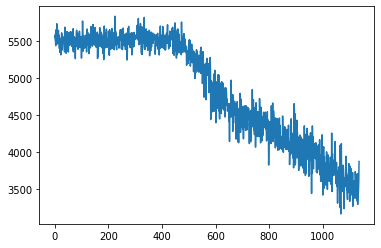

In [ ]:
plt.plot(total_distances_r1)

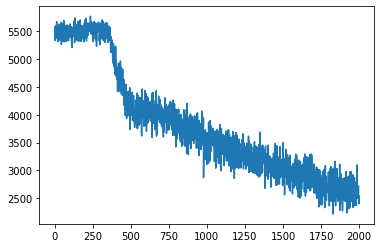

In [ ]:
plt.plot(total_distances_r2)

##solution

In [1095]:
    #initialize with a starting state
    s = 0
    total_distance = 0
    #making a 'completed' dict
    keys = range(0, 275)
    completed = dict(zip(keys, [False] * 275))
    states_memory = []
    completed[s] = True
    done = False

    while not done:     
      #the q 
      q = np.copy(Q[s,:])
      q[states_memory] = -np.inf
      a = np.argmax(q)
      distance = distance_x[s, a]
      
      #update distance and 'completed' dict
      total_distance += distance
      states_memory.append(s)
      completed[s] = True
      #update state
      s = a
      done = all(value == True for value in completed.values())


In [1096]:
total_distance

876.1515068903044

total_distance calculated by the algorithm is much shorter than random walk, which is about 5500km

In [1097]:
journey = states_memory

In [1098]:
journey_ = []
for stop in journey:
  if stop not in journey_:
        journey_.append(stop)

In [1099]:
idx_dict = dict(zip(index, id275))

In [1118]:
journey = []
for stop in journey_:
  journey.append(idx_dict[stop])

In [1119]:
import networkx as nx
graph_distance = nx.Graph()
for connection_id, connection in connections.iterrows():
    graph_distance.add_edge(connection['station1'], connection['station2'], weight = connection['distance'])

In [1120]:
def shortest_route(journey):
  route = []
  j = 0
  for i in journey:
    j+=1
    if j < len(journey)-1:
      route.append(nx.shortest_path(graph_distance, i, journey[j], weight='weight')[1:])
  return route

In [1121]:
route = shortest_route(journey)

In [1122]:
route = [item for items in route for item in items]

In [1100]:
name = tube_stations['name'].to_list()
name_dict = dict(zip(id275, name))

In [ ]:
route_ = []
for stop in route:
  route_.append(name_dict[stop])

698 stops to travel to all the stations. This is sensible result considering there are 275 stops.

## Visualization of solution

###map?

In [ ]:
import folium
base_map = folium.folium.Map([51.5225, -0.1631], zoom_start=10, tiles='cartodbpositron') 

In [ ]:
tsp_station_coords = []
for i in route:
    station_coords = [stations[stations['id']==i]['latitude'].item(), stations[stations['id']==i]['longitude'].item()]
    tsp_station_coords.append(station_coords)

In [ ]:
route_[0:10]

['Chiswick Park',
 'Turnham Green',
 'Stamford Brook',
 'Ravenscourt Park',
 'Hammersmith',
 'Barons Court',
 "Earl's Court",
 'Gloucester Road',
 'South Kensington',
 'Knightsbridge']

In [ ]:
for idx, coord in enumerate(tsp_station_coords):
  folium.Circle(
      location = (coord[0], coord[1]),
      radius = 100, 
      #popup = coord,
      color='green',
      fill=False,
  ).add_to(base_map)


###network representation

In [1103]:
edgelist = connections_[['station1_name', 'station2_name', 'line_colour', 'distance']]

In [1104]:
g = nx.Graph()
for i, elrow in edgelist.iterrows():
    # g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())  # deprecated after NX 1.11
    g.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())

In [1107]:
nodelist = tube_stations[['name','latitude','longitude']]

In [1109]:
for i, nlrow in nodelist.iterrows():
    nx.set_node_attributes(g, {nlrow['name']:  nlrow[1:].to_dict()})  

In [1110]:
node_positions_as_dict = {x[0]: x[1] for x in list(g.nodes(data=True))}

In [1111]:
node_positions_final = {key: value for key, value in node_positions_as_dict.items()}

In [1112]:
node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in list(g.nodes(data=True))}

KeyError: ignored

In [ ]:
list(g.nodes(data=True))

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Graph Representation of London Underground Network')

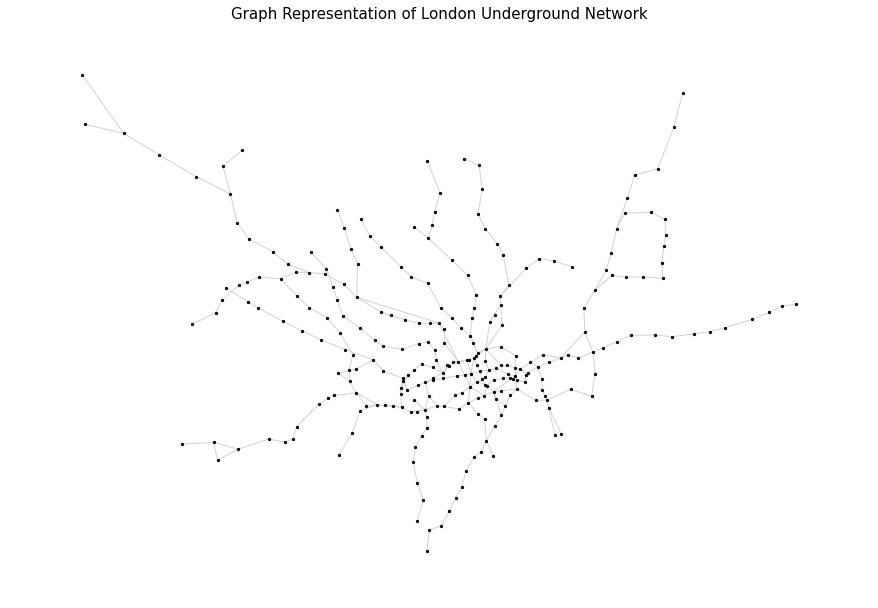

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(g, pos=node_positions, edge_color='lightgrey', node_size=5, node_color='black')
plt.title('Graph Representation of London Underground Network', size=15)

###visualising solution

In [ ]:
route_e = []
for i in range(0, len(route_)-1):
  route_e.append(route_[i+1])
routes = pd.DataFrame(columns=['1',	'2'])
routes['1'] = route_[0:697]
routes['2'] = route_e

In [ ]:
visit_colors = {1:'black', 2:'red'}
edge_cnter = {}
g_i_edge_colors = []

for i, j in routes.iterrows():
    nx.draw(g, pos=node_positions, edge_color='lightgrey', node_size=5, node_color='black')
    routes_i = routes[0:i]
    for i in range(len(route_i)):
        edge_i = frozenset([routes_i.iloc[i][0], routes_i.iloc[i][1]])
    g_i = nx.Graph()
    for i, elrow in routes_i.iterrows():
      g_i.add_edge(elrow[0], elrow[1])
    nx.draw_networkx_nodes(g_i, pos=node_positions, node_size=4, alpha=0.6, node_color='blue', linewidths=0.1)
    nx.draw_networkx_edges(g_i, pos=node_positions, edge_color='red', alpha=0.8)

    plt.axis('off')
    plt.savefig('png/img{}.png'.format(i), dpi=120, bbox_inches='tight')
    plt.close()


In [ ]:
import glob
import imageio
import os

def make_circuit_video(image_path, movie_filename, fps=5):
    # sorting filenames in order
    filenames = glob.glob(image_path + 'img*.png')
    filenames_sort_indices = np.argsort([int(os.path.basename(filename).split('.')[0][3:]) for filename in filenames])
    filenames = [filenames[i] for i in filenames_sort_indices]

    # make movie
    with imageio.get_writer(movie_filename, mode='I', fps=fps) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

make_circuit_video('png/', 'png/route_animation.gif', fps=5)

In [56]:
from IPython.display import Image

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

gifPath = 'png/route_animation.gif'
with open(gifPath,'rb') as f:
    Image(data=f.read(), format='png')

Output hidden; open in https://colab.research.google.com to view.

We can see that this route found by this algorithm 's still making quite a lot of sub-optimal moves. 

will try to improve the algorithm & training method in the coming days.


##test

In [ ]:
im.show()

In [ ]:
g_i.add_edge(route[0], route[1])
g_i.add_edge(route[1], route[2])
g_i.add_edge(route[2], route[3])
g_i.add_edge(route[3], route[4])
edge_color_list = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
nx.draw_networkx_nodes(g_i, pos=node_positions, node_size=6, alpha=0.6, node_color='black', linewidths=0.1)
nx.draw_networkx_edges(g_i, pos=node_positions, edge_color=edge_color_list, alpha=1, linewidths=0.1)


(-0.7015100000000001, 0.34151000000000004, 51.370385, 51.737015)

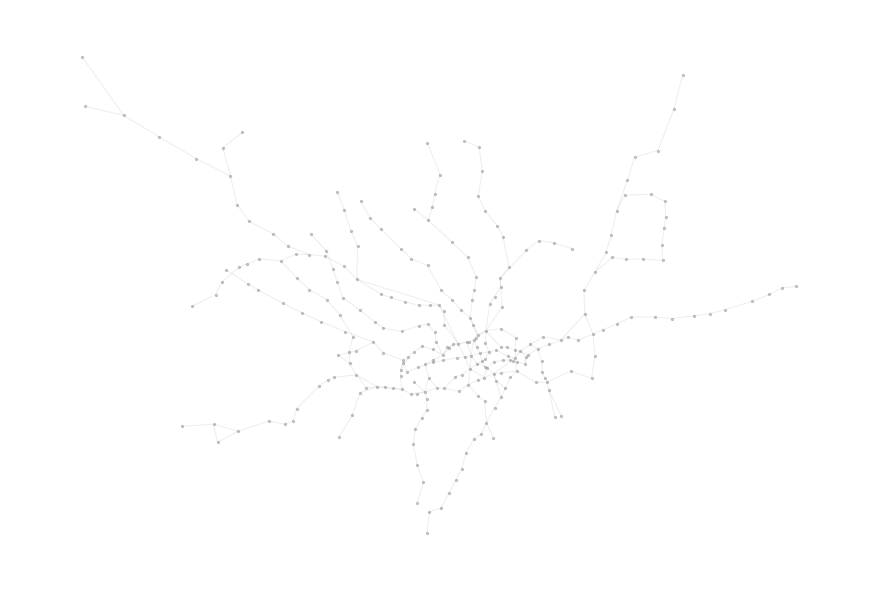

In [ ]:
g_i = nx.Graph(undirected=True)

plt.figure(figsize=(12, 8))
nx.draw(g, pos=node_positions, edge_color='lightgrey', node_size=5, node_color='gray', alpha=0.4)

plt.axis('off')

##test

In [ ]:
distance_matrix[10, 162]

0.4152661876384075

In [ ]:
s = 0
for station in distance_matrix:
  s += 1
  c = 0
  for connection in station:
    c += 1
    if s != c and connection == 0:
      connection +=

In [ ]:
stations.groupby(['id1','id1']).size().unstack().fillna(0)

id1,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
id1,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
for index, row in line_definitions.iterrows():
  connections = connections.append({'line': row[2],
                                    'line_name': routes[routes['line']==row[2]]['name'].item(),
                                    'line_colour': routes[routes['line']==row[2]]['colour'].item(),
                                    'station1': row[0],
                                    'station1_name': stations[stations['id']==row[0]]['name'].item(),
                                    'station1_long': stations[stations['id']==row[0]]['longitude'].item(),
                                    'station1_lat': stations[stations['id']==row[0]]['latitude'].item(),
                                    'station1_zone': stations[stations['id']==row[0]]['zone'].item(),
                                    'station1_total_lines': stations[stations['id']==row[0]]['total_lines'].item(),
                                    'station1_rail': stations[stations['id']==row[0]]['rail'].item(),
                                    'station2': row[1],
                                    'station2_name': stations[stations['id']==row[1]]['name'].item(),
                                    'station2_long': stations[stations['id']==row[1]]['longitude'].item(),
                                    'station2_lat': stations[stations['id']==row[1]]['latitude'].item(),
                                    'station2_zone': stations[stations['id']==row[1]]['zone'].item(),
                                    'station2_total_lines': stations[stations['id']==row[1]]['total_lines'].item(),
                                    'station2_rail': stations[stations['id']==row[1]]['rail'].item(),
                                    }, ignore_index=True)

In [ ]:
connections

,line,line_name,line_colour,station1,station1_name,station1_long,station1_lat,station1_zone,station1_total_lines,station1_rail,station2,station2_name,station2_long,station2_lat,station2_zone,station2_total_lines,station2_rail
0,1,Bakerloo Line,ab6612,11,Baker Street,-0.1571,51.5226,1.0,5,0,163,Marylebone,-0.1631,51.5225,1.0,1,1
1,1,Bakerloo Line,ab6612,11,Baker Street,-0.1571,51.5226,1.0,5,0,212,Regent's Park,-0.1466,51.5234,1.0,1,0
2,1,Bakerloo Line,ab6612,49,Charing Cross,-0.1247,51.5080,1.0,2,1,87,Embankment,-0.1223,51.5074,1.0,4,0
3,1,Bakerloo Line,ab6612,49,Charing Cross,-0.1247,51.5080,1.0,2,1,197,Piccadilly Circus,-0.1342,51.5098,1.0,2,0
4,1,Bakerloo Line,ab6612,82,Edgware Road (B),-0.1679,51.5199,1.0,1,0,163,Marylebone,-0.1631,51.5225,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,11,Victoria Line,0076bd,198,Pimlico,-0.1334,51.4893,1.0,1,0,272,Vauxhall,-0.1253,51.4861,1.5,1,1
373,11,Victoria Line,0076bd,198,Pimlico,-0.1334,51.4893,1.0,1,0,273,Victoria,-0.1447,51.4965,1.0,3,1
374,11,Victoria Line,0076bd,224,Seven Sisters,-0.0749,51.5822,3.0,1,1,260,Tottenham Hale,-0.0594,51.5882,3.0,1,1
375,11,Victoria Line,0076bd,245,Stockwell,-0.1230,51.4723,2.0,2,0,272,Vauxhall,-0.1253,51.4861,1.5,1,1


In [ ]:
connections['station1_name'] = connections['station1_name'] + ' ' + connections['line_name']

In [ ]:
connections

,line,line_name,line_colour,station1,station1_name,station1_long,station1_lat,station1_zone,station1_total_lines,station1_rail,station2,station2_name,station2_long,station2_lat,station2_zone,station2_total_lines,station2_rail
0,1,Bakerloo Line,ab6612,11,Baker Street Bakerloo Line,-0.1571,51.5226,1.0,5,0,163,Marylebone,-0.1631,51.5225,1.0,1,1
1,1,Bakerloo Line,ab6612,11,Baker Street Bakerloo Line,-0.1571,51.5226,1.0,5,0,212,Regent's Park,-0.1466,51.5234,1.0,1,0
2,1,Bakerloo Line,ab6612,49,Charing Cross Bakerloo Line,-0.1247,51.5080,1.0,2,1,87,Embankment,-0.1223,51.5074,1.0,4,0
3,1,Bakerloo Line,ab6612,49,Charing Cross Bakerloo Line,-0.1247,51.5080,1.0,2,1,197,Piccadilly Circus,-0.1342,51.5098,1.0,2,0
4,1,Bakerloo Line,ab6612,82,Edgware Road (B) Bakerloo Line,-0.1679,51.5199,1.0,1,0,163,Marylebone,-0.1631,51.5225,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,11,Victoria Line,0076bd,198,Pimlico Victoria Line,-0.1334,51.4893,1.0,1,0,272,Vauxhall,-0.1253,51.4861,1.5,1,1
373,11,Victoria Line,0076bd,198,Pimlico Victoria Line,-0.1334,51.4893,1.0,1,0,273,Victoria,-0.1447,51.4965,1.0,3,1
374,11,Victoria Line,0076bd,224,Seven Sisters Victoria Line,-0.0749,51.5822,3.0,1,1,260,Tottenham Hale,-0.0594,51.5882,3.0,1,1
375,11,Victoria Line,0076bd,245,Stockwell Victoria Line,-0.1230,51.4723,2.0,2,0,272,Vauxhall,-0.1253,51.4861,1.5,1,1


,id,latitude,longitude,name,display_name,zone,total_lines,rail,id1,line
0,1,51.502800,-0.280100,Acton Town,Acton<br />Town,3.0,2,0,0,0
308,1,51.502800,-0.280100,Acton Town,Acton<br />Town,3.0,2,0,308,1
1,2,51.514300,-0.075500,Aldgate,NaN,1.0,2,0,1,2
309,2,51.514300,-0.075500,Aldgate,NaN,1.0,2,0,309,3
2,3,51.515400,-0.072600,Aldgate East,Aldgate<br />East,1.0,2,0,2,4
...,...,...,...,...,...,...,...,...,...,...
305,306,51.503700,0.048800,London City Airport,London<br />City<br />Airport,3.0,1,0,305,415
303,307,51.502000,0.062700,King George V,King<br />George V,3.0,1,0,303,416
306,308,51.470060,-0.491080,Heathrow Terminal 5,Heathrow<br />Terminal 5,6.0,1,1,306,417
383,309,51.510031,-0.224301,Wood Lane,Wood<br />Lane,2.0,2,0,383,418


In [ ]:
for index, row in connections.iterrows():
  stations_[stations_['id']==row[3]]['line'] = row[0]
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
stations_.loc[stations_['id']==11]['line'] = line_definitions[line_definitions['station1']==11]['line'].unique()
stations_[stations_['id']==11]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,latitude,longitude,name,display_name,zone,total_lines,rail,id1,line
311,11,51.5226,-0.1571,Baker Street,Baker<br />Street,1.0,5,0,311,13
409,11,51.5226,-0.1571,Baker Street,Baker<br />Street,1.0,5,0,409,14
417,11,51.5226,-0.1571,Baker Street,Baker<br />Street,1.0,5,0,417,15
384,11,51.5226,-0.1571,Baker Street,Baker<br />Street,1.0,5,0,384,16
9,11,51.5226,-0.1571,Baker Street,Baker<br />Street,1.0,5,0,9,17


In [ ]:
test['b'] = test['b'].apply(lambda x: [5,6,7])

In [ ]:
stations_.loc[stations_['id']==1, 'line'] = np.concatenate((line_definitions[line_definitions['station1']==1]['line'].unique(), line_definitions[line_definitions['station2']==1]['line'].unique()))


ValueError: ignored

In [ ]:
stations_.loc[stations_['id']==97, 'line'] = np.unique(np.concatenate((
    line_definitions[line_definitions['station1']==97]['line'].unique()
    , line_definitions[line_definitions['station2']==97]['line'].unique())))

In [ ]:
np.unique(np.concatenate((
    line_definitions[line_definitions['station1']==96]['line'].unique()
    , line_definitions[line_definitions['station2']==96]['line'].unique())))

array([4])

In [ ]:
np.unique(np.concatenate((line_definitions[line_definitions['station1']==145]['line'].unique()
, line_definitions[line_definitions['station2']==145]['line'].unique())))

array([ 3,  6,  8,  9, 10, 11])

In [ ]:
stations_.loc[stations_['id']==96]

,id,latitude,longitude,name,display_name,zone,total_lines,rail,id1,line
79,96,51.4804,-0.195,Fulham Broadway,Fulham<br />Broadway,2.0,1,0,79,136


In [ ]:
ilist=[]
for i in range(1,310):
  try:
    stations_.loc[stations_['id']==i, 'line'] = np.unique(np.concatenate((line_definitions[line_definitions['station1']==i]['line'].unique(), line_definitions[line_definitions['station2']==i]['line'].unique())))
  except:
    ilist.append(i)
    pass

## test

In [ ]:
#making a 'completed' dict
keys = pd.unique(connections[['station1', 'station2']].values.ravel('K'))
completed = dict(zip(keys, [False] * len(connections)))

#initialize with a starting state
state = 169
total_distance = 0
completed[state] = True
step = 0
done = False

#loop until every stop is completed
while not done:
  ## all actions allowed,  # Avoid already visited states
  actions = np.concatenate([network[(network[:,0] == state)], network[(network[:,1] == state)]])
  action = actions[np.random.randint(len(actions))]
  ## get distance from matrix maybe
  total_distance += action[2]
  ## update state
  if state == action[0]:
    state = action[1]
  else:
    state = action[0]
  completed[state] = True
  done = all(value == True for value in completed.values())
  step += 1
print(step, total_distance)

In [ ]:
import networkx as nx
graph_distance = nx.Graph()
for connection_id, connection in connections.iterrows():
    graph_distance.add_edge(connection['station1_name'], connection['station2_name'], weight = connection['distance'])